In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - x**2

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

def train_ann(X, y, hidden_neurons=8, activation='sigmoid', epochs=1000, lr=0.01):
    input_dim, output_dim = X.shape[1], y.shape[1]
    w1 = np.random.randn(input_dim, hidden_neurons)
    w2 = np.random.randn(hidden_neurons, output_dim)
    b1 = np.zeros((1, hidden_neurons))
    b2 = np.zeros((1, output_dim))

    if activation == 'sigmoid':
        act, act_deriv = sigmoid, sigmoid_derivative
    elif activation == 'tanh':
        act, act_deriv = tanh, tanh_derivative
    elif activation == 'relu':
        act, act_deriv = relu, relu_derivative

    loss_history = []

    for epoch in range(epochs):
        z1 = np.dot(X, w1) + b1
        a1 = act(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        loss = np.mean((y - a2)**2)
        loss_history.append(loss)

        error = a2 - y
        d2 = error * sigmoid_derivative(a2)
        d1 = np.dot(d2, w2.T) * act_deriv(a1)

        w2 -= lr * np.dot(a1.T, d2)
        b2 -= lr * np.sum(d2, axis=0, keepdims=True)
        w1 -= lr * np.dot(X.T, d1)
        b1 -= lr * np.sum(d1, axis=0, keepdims=True)

    model = lambda x: sigmoid(np.dot(act(np.dot(x, w1) + b1), w2) + b2)
    return model, loss_history


In [3]:
activations = ['sigmoid', 'tanh', 'relu']
performance = {}
losses = {}

for act in activations:
    print(f"\nTraining with {act} activation...")
    model, loss_history = train_ann(X_train, y_train, activation=act)
    y_pred_probs = model(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Store metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf = confusion_matrix(y_true, y_pred)

    performance[act] = {
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'conf_matrix': conf
    }
    losses[act] = loss_history

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")



Training with sigmoid activation...
Accuracy : 0.9667
Precision: 0.9694
Recall   : 0.9667
F1-Score : 0.9664

Training with tanh activation...
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000

Training with relu activation...
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


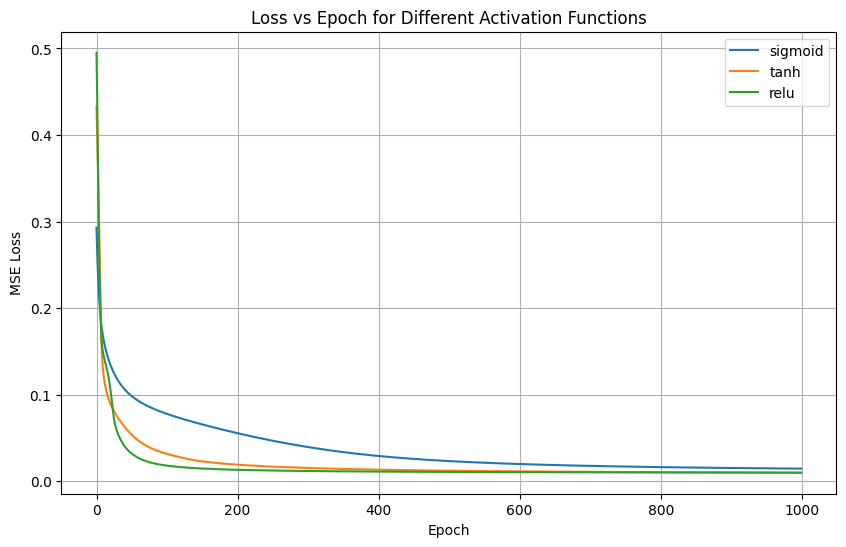

In [4]:
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(losses[act], label=f"{act}")
plt.title("Loss vs Epoch for Different Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


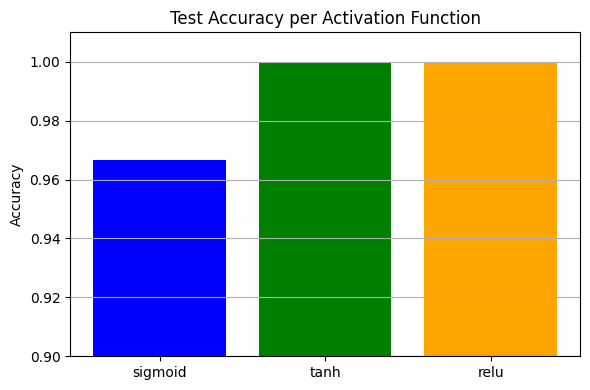

In [5]:
plt.figure(figsize=(6, 4))
plt.bar([k for k in performance], [v['accuracy'] for v in performance.values()],
        color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.title("Test Accuracy per Activation Function")
plt.ylim(0.9, 1.01)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


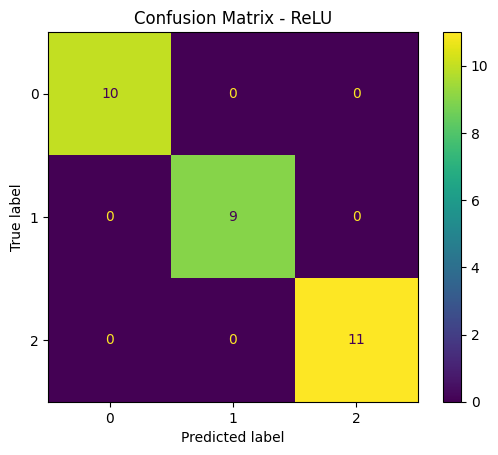

In [6]:
ConfusionMatrixDisplay(performance['relu']['conf_matrix']).plot()
plt.title("Confusion Matrix - ReLU")
plt.show()
